In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [445]:
data = pd.read_csv('/home/vyshnav/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [446]:
correlations = data.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [447]:
data.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [448]:
data = (data-data.mean())/data.std()

In [449]:
x=data.iloc[:,:8]
ones = np.ones((x.shape[0],1))
x = np.column_stack((ones, x))
y=data.iloc[:,8].values

In [450]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 55)

In [451]:

w=np.zeros(9)

alpha=0.1
epoch=1000

In [452]:
def hypothesis(x, w):
    return np.dot(x, w)




In [453]:
def cost_function(x, y, theta):
    m = y.shape[0]
    J = (1/(2*m)) * np.sum((hypothesis(x, theta) - y)**2)
    return J

print("Initial cost", cost_function(x,y,w))

Initial cost 0.49968730456535326


In [454]:
def gradient_descent(x, y, w, alpha, num_iters):
    m = y.shape[0]
    J_history = []
    
    for i in range(num_iters):
        w = w - (alpha/m) * np.dot(x.T, (hypothesis(x, w) - y))
        J_history.append(cost_function(x, y, w))
        
    return w, J_history

weights,cost_history=gradient_descent(x_train,y_train,w,alpha,epoch)
print(weights)

cost_final = cost_function(x,y,weights)
print("Final cost",cost_final)

[-0.02381364  0.09009602 -0.21769922 -0.01871698 -0.08805116 -0.09769219
 -0.05567304  0.1928624   0.3412713 ]
Final cost 0.3229090338122804


Text(0.5, 1.0, 'Error vs. Training Epoch')

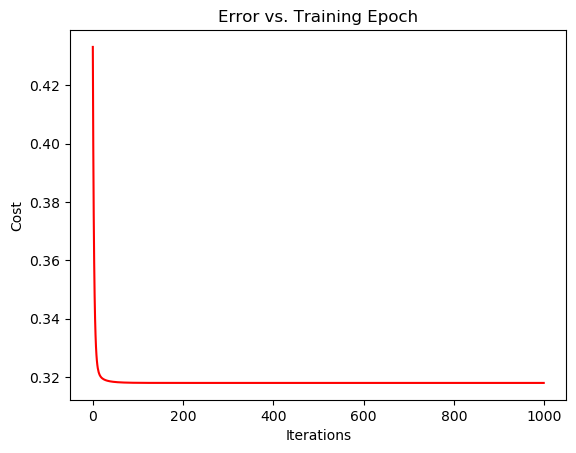

In [455]:

fig , ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')


In [456]:
y_pred=np.dot(x_test,weights)
r2=r2_score(y_test, y_pred)
print("Accuracy of the model is:",r2*100,"%")

Accuracy of the model is: 37.88247530702967 %
